In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

# Suppress RuntimeWarnings
# import warnings
# warnings.filterwarnings('ignore', category=RuntimeWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
def rotate_JSON_by_ROI(json_file_path):
    '''
    Rotates a JSON file containing image data, organizing it by ROI instead of image.

    Args:
        json_file_path (str): Path to the input JSON file.
    '''
    try:
        with open(json_file_path, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f'Error: File not found at {json_file_path}')
        return
    except json.JSONDecodeError:
        print(f'Error: Invalid JSON format in {json_file_path}')
        return

    rotated_data = {}
    for _, image_data in data.items():
        if 'Results' not in image_data:
            continue #skip images without results.
        results = image_data['Results']
        for roi_name, roi_data in results.items():
            if roi_name not in rotated_data:
                rotated_data[roi_name] = []

            # Create a new dictionary that includes the ROI data along with other image-level information.
            image_info = {k: v for k, v in image_data.items() if k != 'Results'}  # copy all image data except for the results.
            for k, v in roi_data.items():
                if isinstance(v, dict):
                    for kk, vv in v.items():
                        if 'Values' in kk:
                            continue #skip raw 'Values'
                        image_info[f'{k}_{kk}'] = vv
                else:
                    image_info[k] = v
            rotated_data[roi_name].append(image_info)

    return rotated_data

In [3]:
def create_CSV_per_ROI(dict_list, out_filepath):
    for roi_name, roi_data_list in dict_list.items():
        try:
            if 'A' in roi_name.split('_')[1]:
                filepath = Path(out_filepath, '1_gratings')
                filepath.mkdir(parents=True, exist_ok=True)
            else:
                filepath = Path(out_filepath, '2_gratings')
                filepath.mkdir(parents=True, exist_ok=True)
            df = pd.DataFrame(roi_data_list)
            csv_filename = f'{roi_name[4:]}.csv'
            df.to_csv(Path(filepath, csv_filename), index=False)
            print(f'ROI "{roi_name}" saved to {csv_filename}')
        except Exception as e:
            print(f'[ERROR] Issue processing ROI "{roi_name}": {e}')

In [4]:
root = Path('/Volumes/krauss/Lisa/GMR/Array/250307/CRP')
parent_filepath = Path(root, 'loc1_sensor3_1/Pos0')
filenames = [Path('image_metadata_SU000001_1.json'),
             Path('image_metadata_SU000001_2.json'),
             Path('image_metadata_SU000001_3.json'),
             Path('image_metadata_SU000001_4.json'),
             Path('image_metadata_SU000001_5.json'),
             Path('image_metadata_SU000001_6.json'),
             Path('image_metadata_SU000001_7.json'),
             Path('image_metadata_SU000001_8.json'),
             Path('image_metadata_SU000001_9.json'),
             Path('image_metadata_SU000001_10.json'),
             Path('image_metadata_SU000001_11.json'),
             Path('image_metadata_SU000001_12.json'),
             Path('image_metadata_SU000001_13.json'),
             Path('image_metadata_SU000001_14.json')]

out_filepath = Path(root, 'Results')

In [ ]:
for fn in filenames:
    input_filepath = Path(parent_filepath, fn)
    print(input_filepath)
    rotated_dict = rotate_JSON_by_ROI(input_filepath)
    create_CSV_per_ROI(rotated_dict, out_filepath)


/Volumes/krauss/Lisa/GMR/Array/250206/Experiment_1_ethanol/loc2_1/Pos0/image_metadata_SU000001_1.json
ROI "ROI_050A_S" saved to 050A_S.csv
ROI "ROI_051A_N" saved to 051A_N.csv
ROI "ROI_051A_S" saved to 051A_S.csv
ROI "ROI_052A_N" saved to 052A_N.csv
ROI "ROI_052A_S" saved to 052A_S.csv
ROI "ROI_053A_N" saved to 053A_N.csv
ROI "ROI_053A_S" saved to 053A_S.csv
ROI "ROI_060A_N" saved to 060A_N.csv
ROI "ROI_060A_S" saved to 060A_S.csv
/Volumes/krauss/Lisa/GMR/Array/250206/Experiment_1_ethanol/loc2_1/Pos0/image_metadata_SU000001_2.json
ROI "ROI_061A_N" saved to 061A_N.csv
ROI "ROI_061A_S" saved to 061A_S.csv
ROI "ROI_062A_N" saved to 062A_N.csv
ROI "ROI_062A_S" saved to 062A_S.csv
ROI "ROI_063A_N" saved to 063A_N.csv
ROI "ROI_063A_S" saved to 063A_S.csv
ROI "ROI_070A_N" saved to 070A_N.csv
ROI "ROI_070A_S" saved to 070A_S.csv
ROI "ROI_071A_N" saved to 071A_N.csv
ROI "ROI_071A_S" saved to 071A_S.csv
ROI "ROI_072A_N" saved to 072A_N.csv
/Volumes/krauss/Lisa/GMR/Array/250206/Experiment_1_ethan

Exception: index 36 is out of bounds for axis 0 with size 36
Exception: index 37 is out of bounds for axis 0 with size 36
Exception: index 38 is out of bounds for axis 0 with size 36


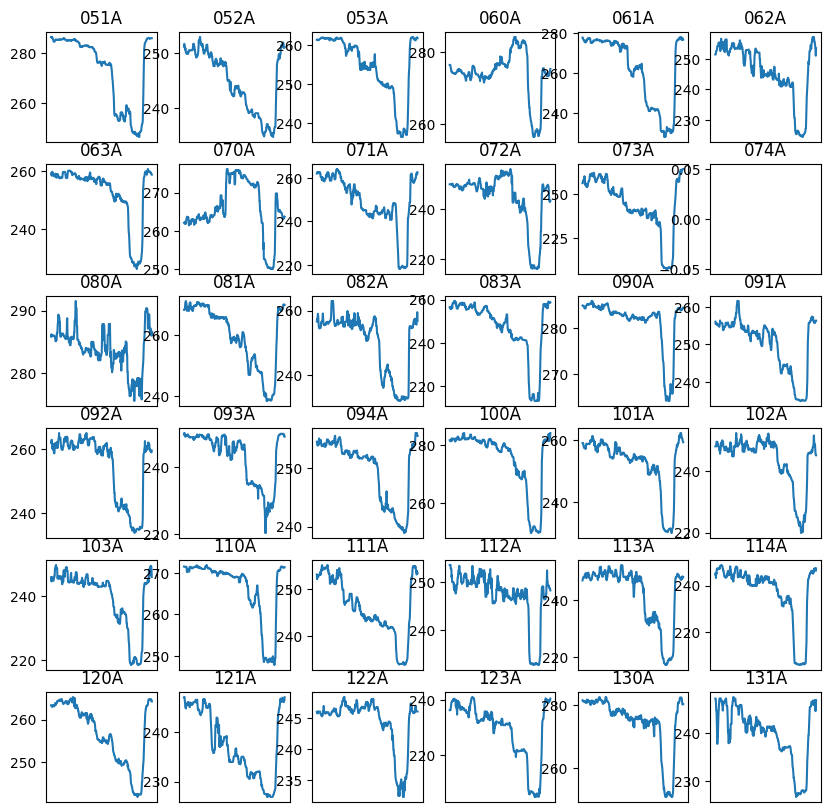

In [13]:
root = Path('/Volumes/krauss/Lisa/GMR/Array/250206/Experiment_1_ethanol')
parent_filepath = Path(root, 'Results', '1_gratings')

filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

paired_prefixes = []
for p in file_prefixes:
    file1_exists = Path(parent_filepath, f'{p}_S.csv').is_file()
    file2_exists = Path(parent_filepath, f'{p}_N.csv').is_file()
    
    if file1_exists and file2_exists:
        paired_prefixes.append((f'{p}_S.csv', f'{p}_N.csv'))

fig, ax = plt.subplots(6, 6, figsize=(10, 10))
ax = ax.ravel()
for idx, (p0, p1) in enumerate(paired_prefixes):
    df1 = pd.read_csv(Path(parent_filepath, p0))
    df1 = df1.set_index('Time Stamp')
    df2 = pd.read_csv(Path(parent_filepath, p1))
    df2 = df2.set_index('Time Stamp')
    df3 = df1['mu_Median'] + df2['mu_Median']
    try:
        # ax[idx].plot(df1['mu_Median'].rolling(window=10).median())
        # ax[idx].plot(df2['mu_Median'].rolling(window=10).median())
        ax[idx].plot(df3.rolling(window=10).median())
        ax[idx].set_title(df1['ROI-label'].iloc[0][:-2])
        # ax[idx].set_ylim([0, 181])
        ax[idx].set_xticks([])
    except Exception as e:
        print(f'Exception: {e}')
plt.show()

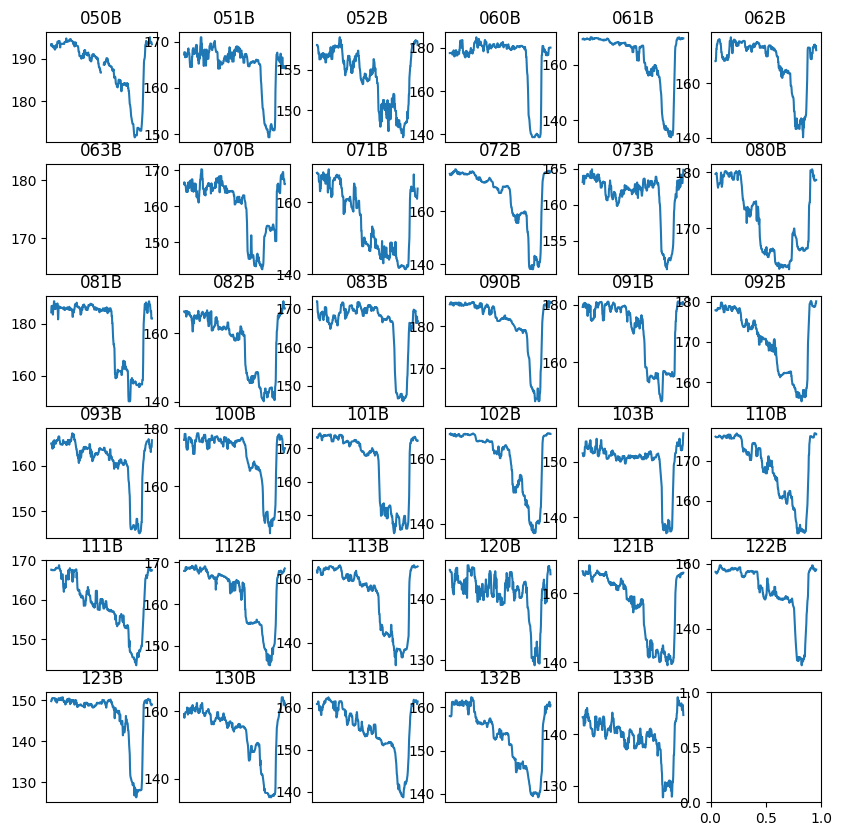

In [14]:
root = Path('/Volumes/krauss/Lisa/GMR/Array/250206/Experiment_1_ethanol')
parent_filepath = Path(root, 'Results', '2_gratings')

filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

paired_prefixes = []
for p in file_prefixes:
    file1_exists = Path(parent_filepath, f'{p}_S.csv').is_file()
    file2_exists = Path(parent_filepath, f'{p}_N.csv').is_file()
    
    if file1_exists and file2_exists:
        paired_prefixes.append((f'{p}_S.csv', f'{p}_N.csv'))

fig, ax = plt.subplots(6, 6, figsize=(10, 10))
ax = ax.ravel()
for idx, (p0, p1) in enumerate(paired_prefixes):
    df1 = pd.read_csv(Path(parent_filepath, p0))
    df1 = df1.set_index('Time Stamp')
    df2 = pd.read_csv(Path(parent_filepath, p1))
    df2 = df2.set_index('Time Stamp')
    df3 = df1['mu_Median'] + df2['mu_Median']
    try:
        # ax[idx].plot(df1['mu_Median'].rolling(window=10).median())
        # ax[idx].plot(df2['mu_Median'].rolling(window=10).median())
        ax[idx].plot(df3.rolling(window=10).median())
        ax[idx].set_title(df1['ROI-label'].iloc[0][:-2])
        # ax[idx].set_ylim([0, 181])
        ax[idx].set_xticks([])
    except Exception as e:
        print(f'Exception: {e}')
plt.show()

In [15]:
df1.columns

Index(['Sensor ID', 'Setup ID', 'Reader ID', 'Root Path', 'File Path', 'Error',
       'Processed', 'Brightness', 'Contrast', 'Analysis-method',
       'amplitude_Mean', 'amplitude_STD', 'amplitude_LQ', 'amplitude_Median',
       'amplitude_UQ', 'amplitude_Max', 'mu_Mean', 'mu_STD', 'mu_LQ',
       'mu_Median', 'mu_UQ', 'mu_Max', 'sigma_Mean', 'sigma_STD', 'sigma_LQ',
       'sigma_Median', 'sigma_UQ', 'sigma_Max', 'offset_Mean', 'offset_STD',
       'offset_LQ', 'offset_Median', 'offset_UQ', 'offset_Max', 'error_Mean',
       'error_STD', 'error_LQ', 'error_Median', 'error_UQ', 'error_Max',
       'ROI-label'],
      dtype='object')

<Axes: xlabel='Time Stamp'>

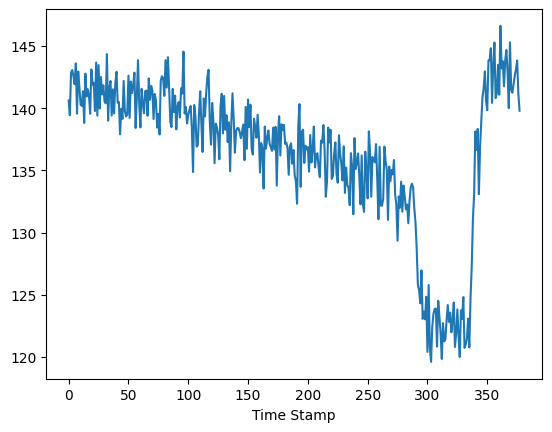

In [17]:
df3 = df1['mu_Mean'] + df2['mu_Mean']
df3.plot()

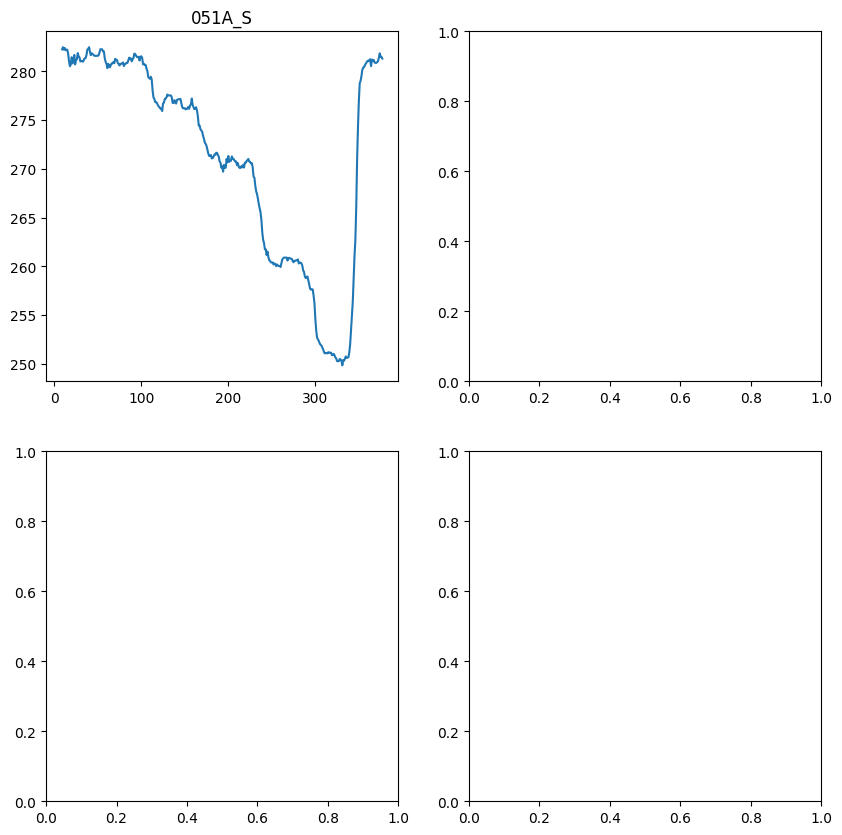

In [19]:
root = Path('/Volumes/krauss/Lisa/GMR/Array/250206/Experiment_1_ethanol')
parent_filepath = Path(root, 'Results')

filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

paired_prefixes = [('1_gratings/051A_S.csv', '1_gratings/051A_N.csv')]

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()
for idx, (p0, p1) in enumerate(paired_prefixes):
    df1 = pd.read_csv(Path(parent_filepath, p0))
    df1 = df1.set_index('Time Stamp')
    df2 = pd.read_csv(Path(parent_filepath, p1))
    df2 = df2.set_index('Time Stamp')
    df3 = df1['mu_Mean'].rolling(window=10).median() + df2['mu_Mean'].rolling(window=10).median()
    try:
        # ax[idx].plot(df1['mu_Median'].rolling(window=10).median())
        # ax[idx].plot(df2['mu_Median'].rolling(window=10).median())
        ax[idx].plot(df3)
        ax[idx].set_title(df1['ROI-label'].iloc[0])
        # ax[idx].set_ylim([0, 181])
        # ax[idx].set_xticks([])
    except Exception as e:
        print(f'Exception: {e}')
plt.show()

Exception: 'x' has size 375, but 'y1' has an unequal size of 444
Exception: 'x' has size 396, but 'y1' has an unequal size of 444
Exception: 'x' has size 85, but 'y1' has an unequal size of 444


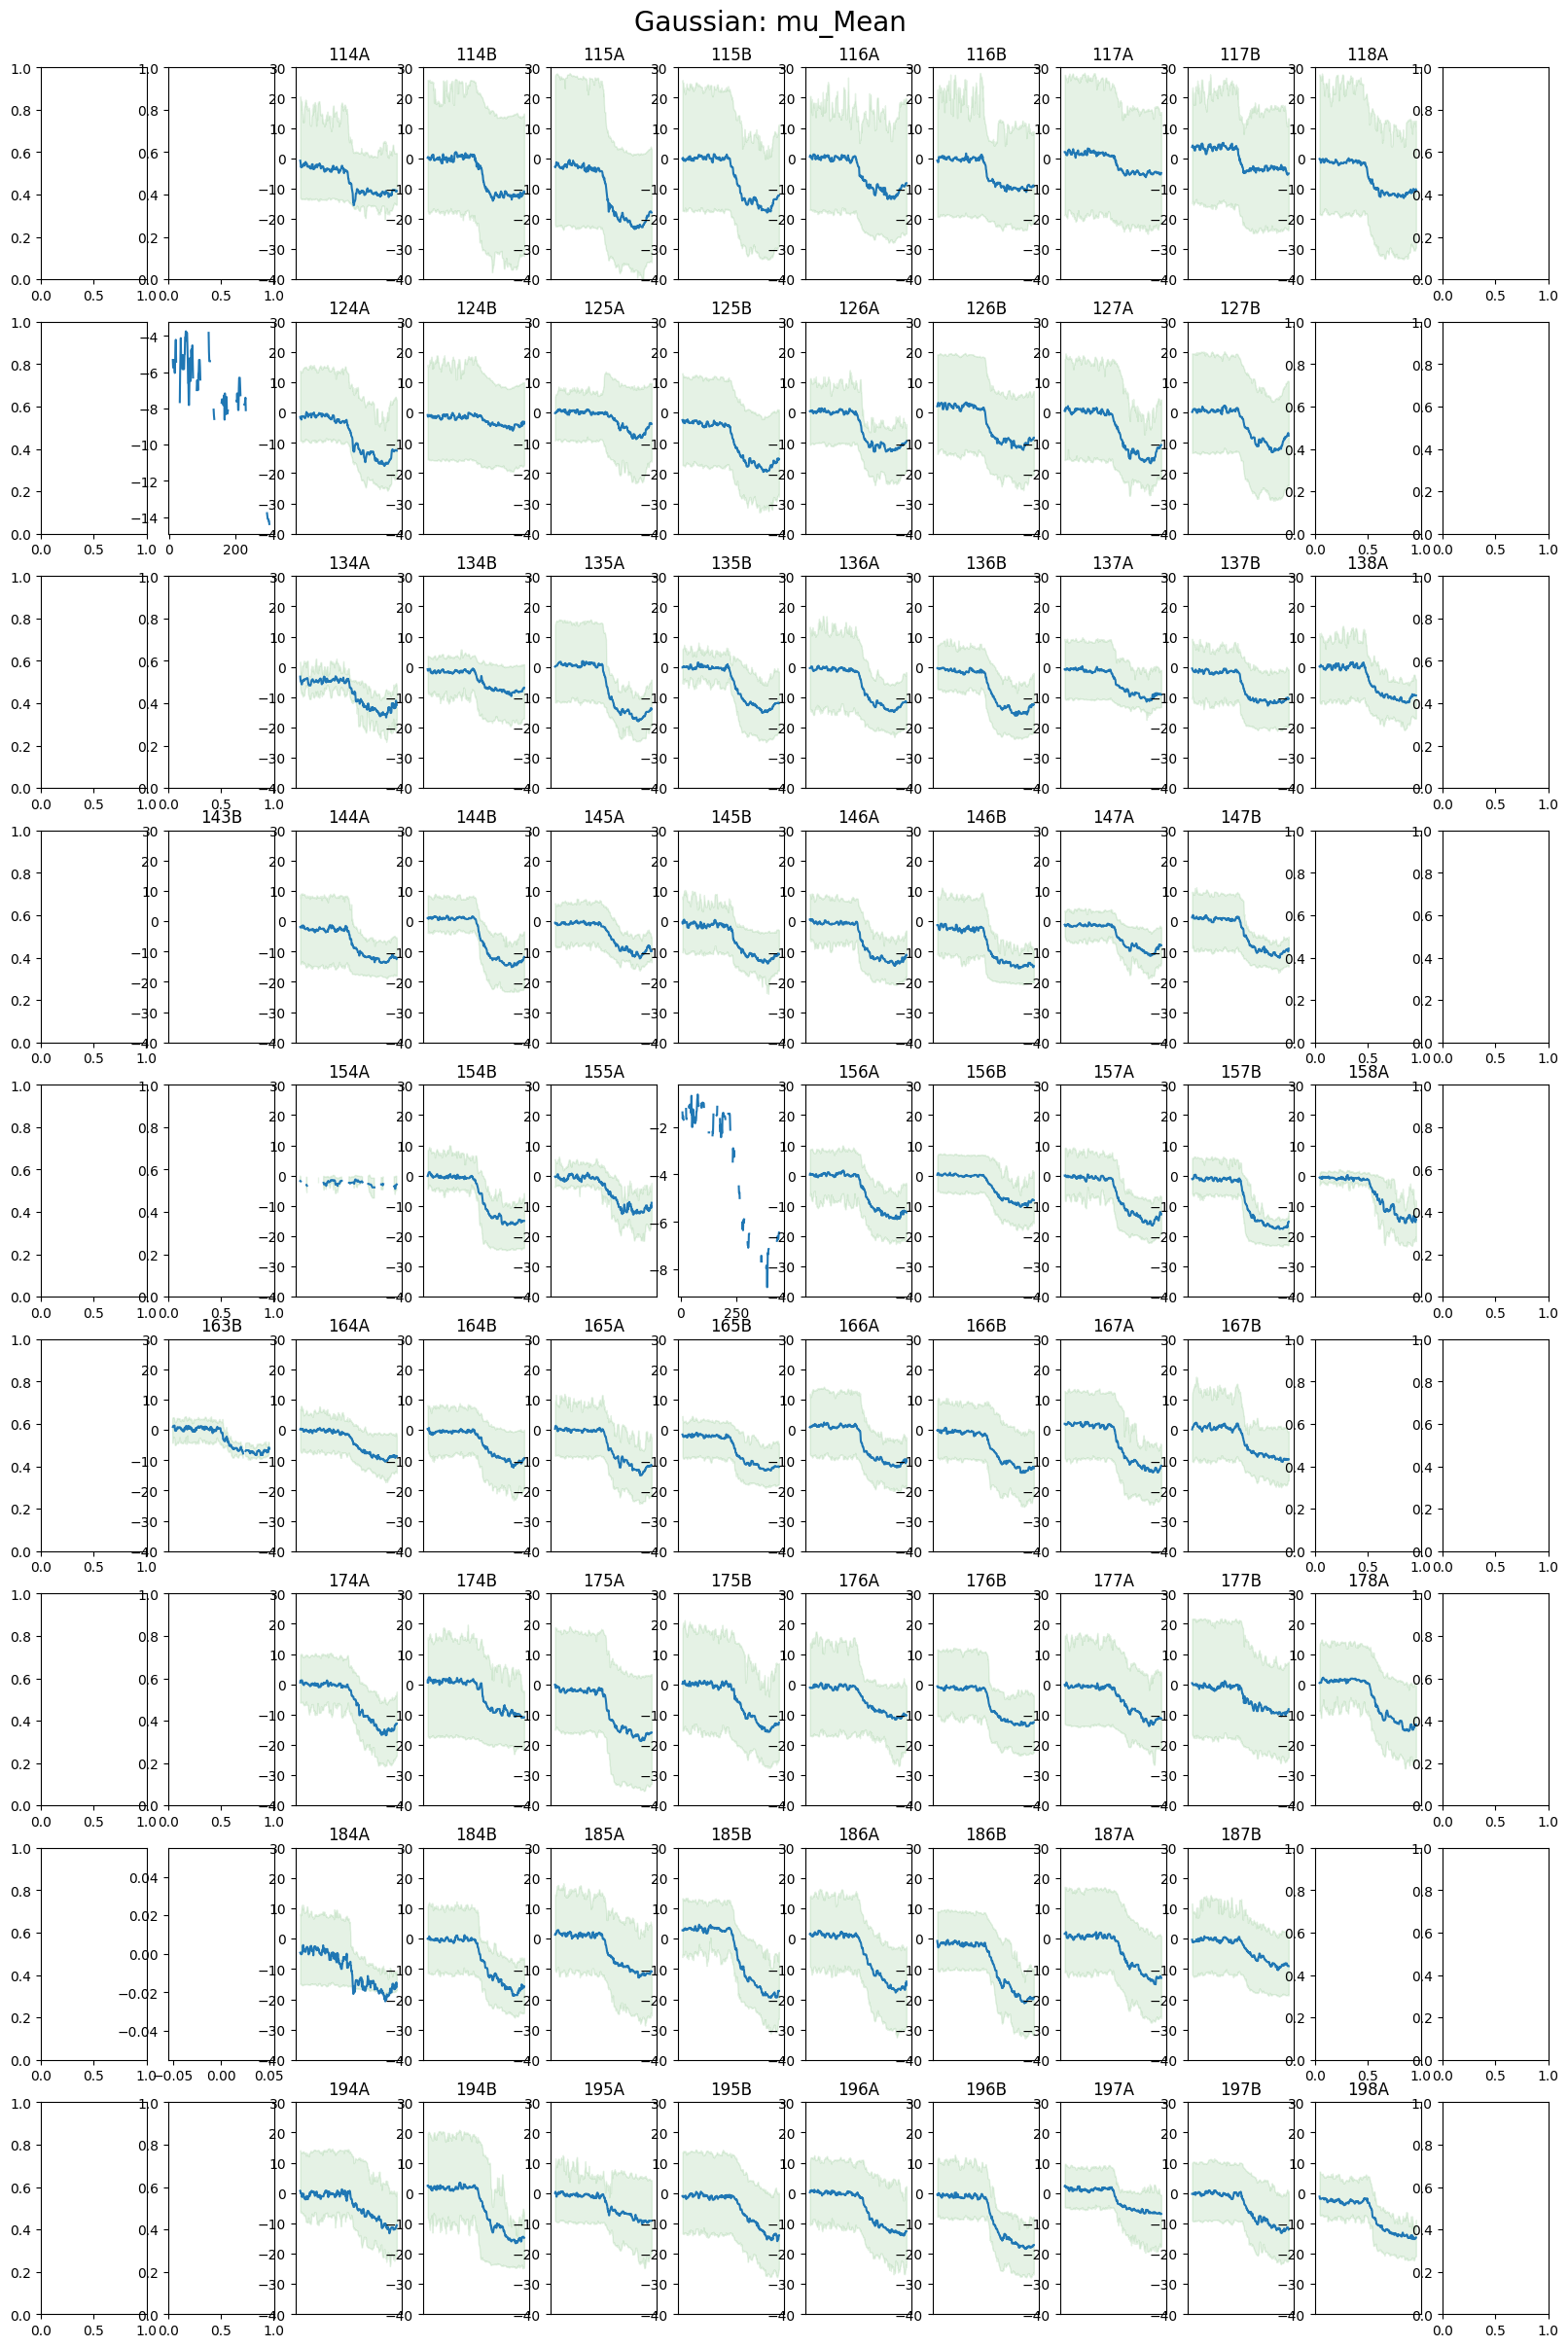

In [31]:
variable = 'mu'
technique = 'Mean'

data_name = f'{variable}_{technique}'

root = Path('/Volumes/krauss/Lisa/GMR/Array/250225/loc1_1')
parent_filepath = Path(root, 'Results', '1_gratings')

filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

paired_prefixes = []
for p in file_prefixes:
    file1_exists = Path(parent_filepath, f'{p}_S.csv').is_file()
    file2_exists = Path(parent_filepath, f'{p}_N.csv').is_file()
    
    if file1_exists and file2_exists:
        paired_prefixes.append((f'1_gratings/{p}_S.csv', f'1_gratings/{p}_N.csv'))

parent_filepath = Path(root, 'Results', '2_gratings')

filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

for p in file_prefixes:
    file1_exists = Path(parent_filepath, f'{p}_S.csv').is_file()
    file2_exists = Path(parent_filepath, f'{p}_N.csv').is_file()
    
    if file1_exists and file2_exists:
        paired_prefixes.append((f'2_gratings/{p}_S.csv', f'2_gratings/{p}_N.csv'))

# Calculate lowest column number and how many rows and cols needed for plot
min_x = 100
xs = set()
ys = set()
for p0, p1 in paired_prefixes:
    min_x = np.min([min_x, int(p0.split('/')[1][2:3]), int(p1.split('/')[1][2:3])])
    xs.add(int(p0.split('/')[1][2:3]))
    ys.add(int(p0.split('/')[1][:2]))

fig, ax = plt.subplots(len(ys), len(xs) * 2, figsize=(20, 30))
for p0, p1 in paired_prefixes:
    ax_idx_y = int(p0.split('/')[1][:2]) - int(paired_prefixes[0][0].split('/')[1][:2])
    if 'A' in p0.split('/')[1]:
        ax_idx_x = (int(p0.split('/')[1][2:3]) - min_x) * 2
    else:
        ax_idx_x = ((int(p0.split('/')[1][2:3]) - min_x) * 2) + 1
    df1 = pd.read_csv(Path(root, 'Results', p0)).set_index('Time Stamp')
    df2 = pd.read_csv(Path(root, 'Results', p1)).set_index('Time Stamp')
    df3 = (df1[data_name] + df2[data_name]) - (df1[data_name].iloc[0] + df2[data_name].iloc[0])
    df5 = ((df1[f'{variable}_UQ'] + df2[f'{variable}_UQ'])) - (df1[data_name].iloc[0] + df2[data_name].iloc[0])
    df4 = ((df1[f'{variable}_LQ'] + df2[f'{variable}_LQ'])) - (df1[data_name].iloc[0] + df2[data_name].iloc[0])
    try:
        ax[ax_idx_y][ax_idx_x].plot(df3.rolling(window=10).median())
        ax[ax_idx_y][ax_idx_x].fill_between(df1.index, df4.rolling(window=10).median(), df5.rolling(window=10).median(), color='green', alpha=0.1)
        ax[ax_idx_y][ax_idx_x].set_title(df1['ROI-label'].iloc[0][:-2])
        ax[ax_idx_y][ax_idx_x].set_ylim([-40, 30])
        ax[ax_idx_y][ax_idx_x].set_xticks([])
    except Exception as e:
        print(f'Exception: {e}')
fig.suptitle(f'Gaussian: {data_name}', fontsize=20, y=0.9)
# plt.show()
plt.savefig(Path(root, 'Results', 'Gaussian_Mu_Mean_Analysis.png'), dpi=300, bbox_inches='tight')

/var/folders/75/r_xj17014pz1p1pfhx37p8gr0000gq/T/ipykernel_67355/1508558071.py:64: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  im = ax.imshow(data, aspect='equal', interpolation='nearest', vmin=-40, vmax=30)
/var/folders/75/r_xj17014pz1p1pfhx37p8gr0000gq/T/ipykernel_67355/1508558071.py:64: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im = ax.imshow(data, aspect='equal', interpolation='nearest', vmin=-40, vmax=30)


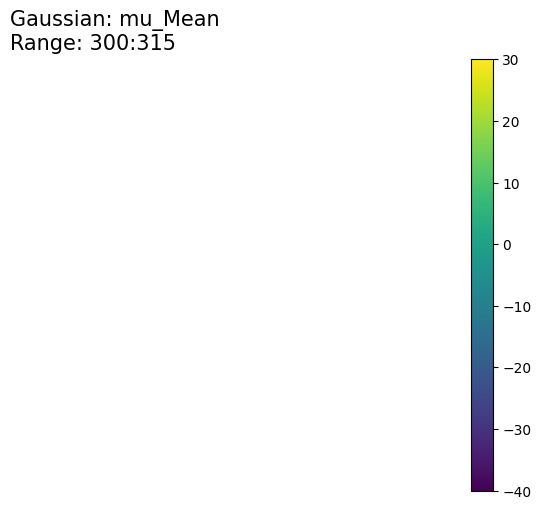

In [ ]:
variable = 'mu'
technique = 'Mean'
lower = 300
upper = 315

vmin = -40
vmax = 30

data_name = f'{variable}_{technique}'

root = Path('/Volumes/krauss/Lisa/GMR/Array/250225/loc1_1')
parent_filepath = Path(root, 'Results', '1_gratings')

filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

paired_prefixes = []
for p in file_prefixes:
    file1_exists = Path(parent_filepath, f'{p}_S.csv').is_file()
    file2_exists = Path(parent_filepath, f'{p}_N.csv').is_file()
    
    if file1_exists and file2_exists:
        paired_prefixes.append((f'1_gratings/{p}_S.csv', f'1_gratings/{p}_N.csv'))

parent_filepath = Path(root, 'Results', '2_gratings')

filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

for p in file_prefixes:
    file1_exists = Path(parent_filepath, f'{p}_S.csv').is_file()
    file2_exists = Path(parent_filepath, f'{p}_N.csv').is_file()
    
    if file1_exists and file2_exists:
        paired_prefixes.append((f'2_gratings/{p}_S.csv', f'2_gratings/{p}_N.csv'))

dfs = {}  # Dictionary to store all dataframes
min_x = 100
xs = set()
ys = set()
for p0, p1 in paired_prefixes:
    df1 = pd.read_csv(Path(root, 'Results', p0)).set_index('Time Stamp')
    df2 = pd.read_csv(Path(root, 'Results', p1)).set_index('Time Stamp')
    dfs[(p0, p1)] = (df1[data_name] + df2[data_name]) - (df1[data_name].iloc[0] + df2[data_name].iloc[0])
    min_x = np.min([min_x, int(p0.split('/')[1][2:3]), int(p1.split('/')[1][2:3])])
    xs.add(int(p0.split('/')[1][2:3]))
    ys.add(int(p0.split('/')[1][:2]))

data = np.full([len(ys), len(xs) * 2], np.nan)

for p0, p1 in paired_prefixes:
    ax_idx_0 = (-1 * ((int(paired_prefixes[0][0].split('/')[1][:2])) - int(p0.split('/')[1][:2])))
    if 'A' in p0.split('/')[1]:
        ax_idx_1 = (int(p0.split('/')[1][2:3]) - min_x) * 2
    else:
        ax_idx_1 = ((int(p0.split('/')[1][2:3]) - min_x) * 2) + 1
    data[ax_idx_0][ax_idx_1] = dfs[(p0, p1)].iloc[lower:upper].mean()

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.axis('off')
ax.set_title(f'Gaussian: {data_name}\nRange: {lower:03d}:{upper:03d}', loc='left', fontsize=15)
im = ax.imshow(data, aspect='equal', interpolation='nearest', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
plt.show()
# plt.savefig(Path(root, 'Results', 'Gaussian_Mu_Mean_Snalysis_INVERTED.png'), dpi=300, bbox_inches='tight')

### Make color video of resonance position

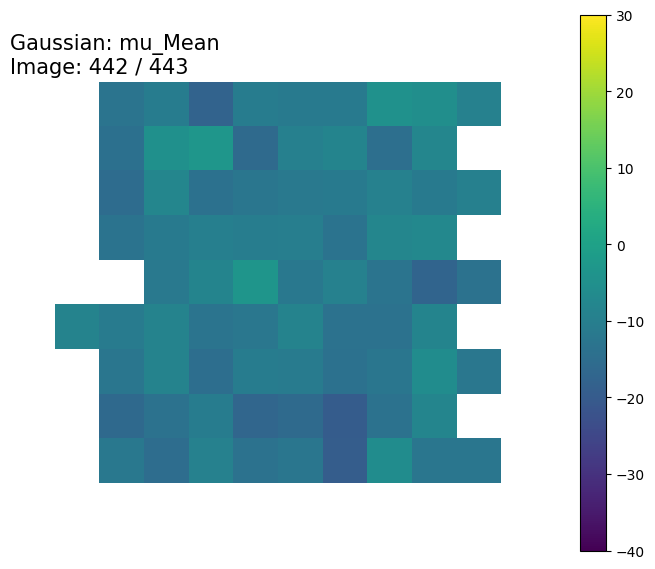

In [37]:
from matplotlib.animation import FFMpegWriter
from matplotlib.offsetbox import AnchoredText

variable = 'mu'
technique = 'Mean'
window = 1

root = Path('/Volumes/krauss/Lisa/GMR/Array/250225/loc1_1')
video_filepath = Path(root, 'Results', f'Gaussian_Mu_Mean_HeatMap_win{window}.mp4')
starting_num = 0
ending_num = 443

vmin = -40
vmax = 30

data_name = f'{variable}_{technique}'

writer = FFMpegWriter(fps=30)

fig, ax = plt.subplots(1, 1, figsize=(7, 7), layout='tight')
ax.axis('off')
ax.set_title(f'Gaussian: {data_name}\nImage: {starting_num:03d} / {ending_num}', loc='left', fontsize=15)

dfs = {}  # Dictionary to store all dataframes
min_x = 100
xs = set()
ys = set()
for p0, p1 in paired_prefixes:
    df1 = pd.read_csv(Path(root, 'Results', p0)).set_index('Time Stamp')
    df2 = pd.read_csv(Path(root, 'Results', p1)).set_index('Time Stamp')
    dfs[(p0, p1)] = (df1[data_name] + df2[data_name]) - (df1[data_name].iloc[0] + df2[data_name].iloc[0])
    min_x = np.min([min_x, int(p0.split('/')[1][2:3]), int(p1.split('/')[1][2:3])])
    xs.add(int(p0.split('/')[1][2:3]))
    ys.add(int(p0.split('/')[1][:2]))

data = np.full([len(ys), len(xs) * 2], np.nan)

for p0, p1 in paired_prefixes:
    ax_idx_0 = (-1 * ((int(paired_prefixes[0][0].split('/')[1][:2])) - int(p0.split('/')[1][:2])))
    if 'A' in p0.split('/')[1]:
        ax_idx_1 = (int(p0.split('/')[1][2:3]) - min_x) * 2
    else:
        ax_idx_1 = ((int(p0.split('/')[1][2:3]) - min_x) * 2) + 1
    data[ax_idx_0][ax_idx_1] = dfs[(p0, p1)].iloc[0]

img_chirp = ax.imshow(data, aspect='equal', interpolation='none', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(img_chirp, ax=ax, shrink=0.8)

with writer.saving(fig, video_filepath, dpi=100):
    for idx in range(starting_num, ending_num + 1 - window):
        for p0, p1 in paired_prefixes:
            ax_idx_0 = (-1 * ((int(paired_prefixes[0][0].split('/')[1][:2])) - int(p0.split('/')[1][:2])))
            if 'A' in p0.split('/')[1]:
                ax_idx_1 = (int(p0.split('/')[1][2:3]) - min_x) * 2
            else:
                ax_idx_1 = ((int(p0.split('/')[1][2:3]) - min_x) * 2) + 1

            try:
                data[ax_idx_0][ax_idx_1] = dfs[(p0, p1)].iloc[idx:idx + window].mean()
            except IndexError as e:
                print(f'[ERROR] Index error at {e}')
                data[ax_idx_0][ax_idx_1] = 0

        img_chirp.set_data(data)
        ax.set_title(f'Gaussian: {data_name}\nImage: {idx:03d} / {ending_num}', loc='left', fontsize=15)

        writer.grab_frame()
        print(f'Frame {idx + 1} of {ending_num} written', end='\r')